In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Superstore.csv',encoding='windows-1252')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
df.shape
print('number of rows:',df.shape[0])
print('number of columns:',df.shape[1])

number of rows: 9994
number of columns: 21


In [4]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
df["Ship Date"]=pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')       #converting to datetime 

df['Order Date']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y')     #converting to datetime

In [6]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
df.set_index('Row ID',inplace=True)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
df['Order ID'].replace('0',np.NaN)

Row ID
1       CA-2013-152156
2       CA-2013-152156
3       CA-2013-138688
4       US-2012-108966
5       US-2012-108966
             ...      
9990    CA-2011-110422
9991    CA-2014-121258
9992    CA-2014-121258
9993    CA-2014-121258
9994    CA-2014-119914
Name: Order ID, Length: 9994, dtype: object

In [9]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2013-06-27 00:00:00,2013-06-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [10]:
df.isnull().sum()               # checking wheather tha data contains null or not

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
df.drop_duplicates()
df.head(2)                          # drop duplicated rows

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


## Exploratory data analysis

### TOP 5 CUSTOMERS

In [12]:
df.groupby(['Order ID'],as_index=False)['Order ID'].count().sort_values(by=['Order ID'],ascending=False).head(5)

,Order ID
2797,14
3954,12
4528,11
2727,11
1782,10


In [13]:
a=df.groupby(['Order ID'],as_index=False)['Order ID'].count().sort_values(by=['Order ID'],ascending=False).head(5)

b=pd.DataFrame(a)
b['Order_ID']=b.index
b.rename(columns={'Order ID' : 'No_of_Orders'},inplace=True)  
b

,No_of_Orders,Order_ID
2797,14,2797
3954,12,3954
4528,11,4528
2727,11,2727
1782,10,1782


<Axes: xlabel='Order_ID', ylabel='No_of_Orders'>

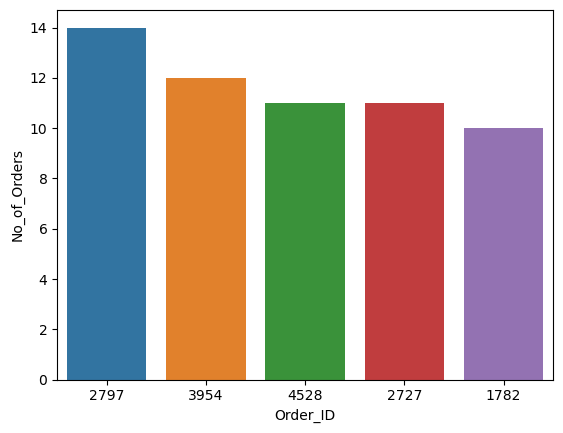

In [14]:
sns.barplot(x='Order_ID',y='No_of_Orders',data=b,order=b.sort_values('No_of_Orders',ascending=False).Order_ID)

From the above graph, we can get the TOP 5 customers of our company.

### BEST CATEGORY

In [15]:
df.groupby('Category',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


<Axes: xlabel='Category', ylabel='Sales'>

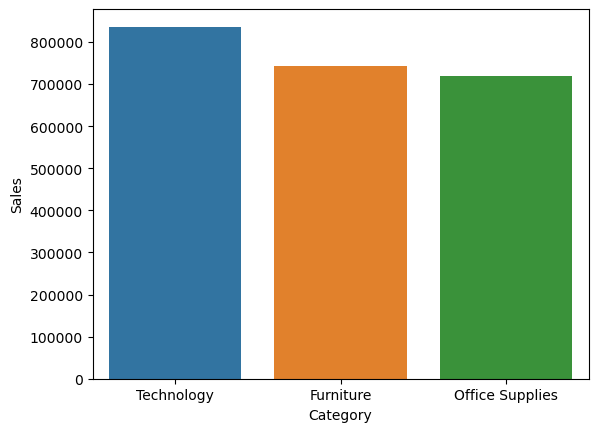

In [16]:
a=df.groupby('Category',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sns.barplot(x='Category',y='Sales',data=a,order=a.sort_values('Sales',ascending=False).Category)

From the above graph, we can understand that TECHNOLOGY is the most profitable category.

### MOST PROFITABLE CITIES

In [17]:
df.groupby('City',as_index=False)['Order ID'].count().sort_values(by=['Order ID'],ascending=False).head(5)

,City,Order ID
329,New York City,915
266,Los Angeles,747
374,Philadelphia,537
438,San Francisco,510
452,Seattle,428


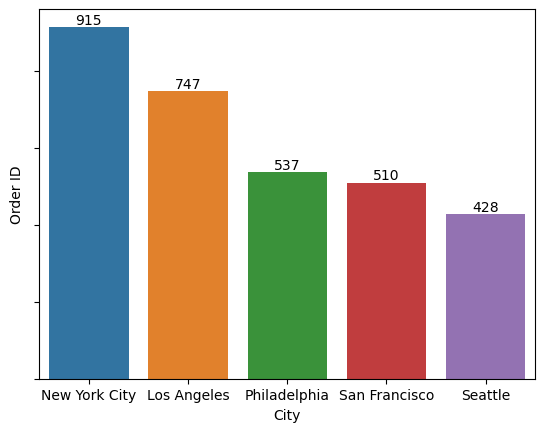

In [18]:
a=df.groupby('City',as_index=False)['Order ID'].count().sort_values(by=['Order ID'],ascending=False).head(5)
ax=sns.barplot(x='City',y='Order ID',data=a)
plt.xlabel('City')
plt.gca().set_yticklabels([])
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph, we can see the 5 most profitable CITIES.

### SALES VS PROFIT

<Axes: xlabel='Sales', ylabel='Profit'>

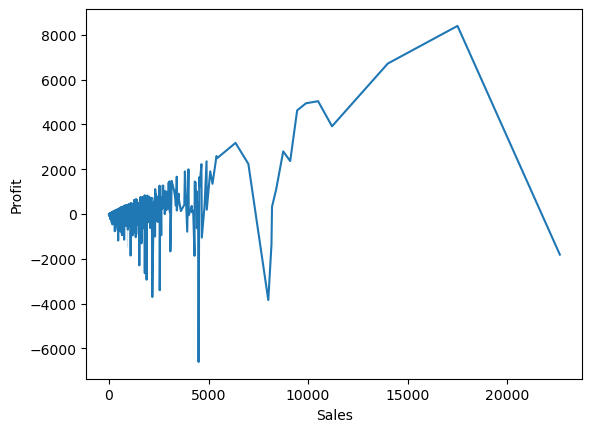

In [19]:
sns.lineplot(data=df,x='Sales',y='Profit')

From the above graph, we can understand that PROFIT not proportional to SALES.

### DATE VS SALES

In [33]:
df.groupby('Order Date',as_index=False)['Sales'].sum().sort_values(by=['Order Date'],ascending=False).head(10)   # sales in last 10 days

,Order Date,Sales
1237,2014-12-31,713.7900
1236,2014-12-30,2915.5340
1235,2014-12-29,1657.3508
1234,2014-12-28,177.6360
1233,2014-12-27,814.5940
1232,2014-12-26,2698.9270
1231,2014-12-25,6233.0540
1230,2014-12-24,1926.7760
1229,2014-12-23,7442.0210
1228,2014-12-22,2140.9400


<Axes: xlabel='Sales', ylabel='Order Date'>

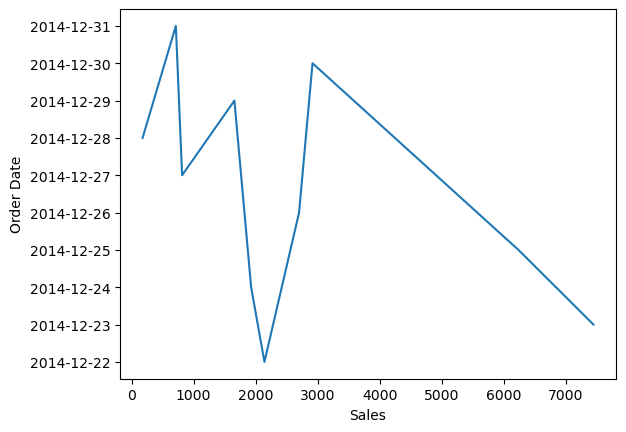

In [40]:
a=df.groupby('Order Date',as_index=False)['Sales'].sum().sort_values(by=['Order Date'],ascending=False).head(10)
sns.lineplot(x='Sales',y='Order Date',data=a)

In [34]:
df.groupby('Order Date',as_index=False)['Sales'].sum().sort_values(by=['Order Date'],ascending=False).tail(10)  # Sales in first 10 days

,Order Date,Sales
9,2011-01-15,61.960
8,2011-01-14,3553.795
7,2011-01-12,9.940
6,2011-01-11,54.830
5,2011-01-10,40.544
4,2011-01-08,87.158
3,2011-01-07,4407.100
2,2011-01-06,19.536
1,2011-01-05,288.060
0,2011-01-04,16.448


<Axes: xlabel='Sales', ylabel='Order Date'>

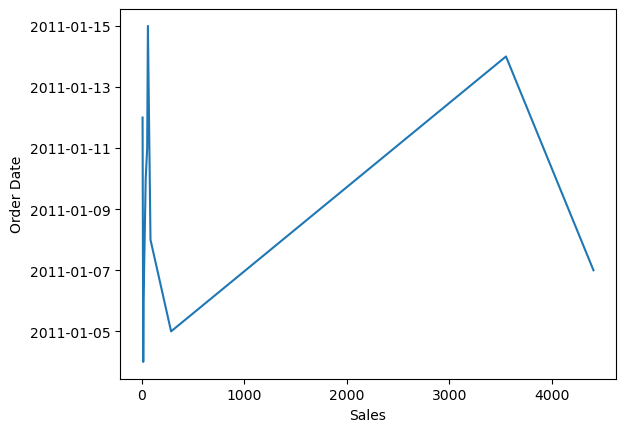

In [39]:
b=df.groupby('Order Date',as_index=False)['Sales'].sum().sort_values(by=['Order Date'],ascending=False).tail(10)
sns.lineplot(x='Sales',y='Order Date',data=b)

 From the above 2 graphs, we can understand that sales become high on weekends.

# Conclusion

From the analysis,we can get that:
    
    CATEGORY
    
    * Technology is the most profitable category of sales.
    * Furniture and Office supplies are on approximate same sales
    
    CITIES
    
    * New York city is the most profitable city and Seattle is the least profitable city.
    
    PROFIT
    
    * Sales is indirectly proportional to Profit.
    
    DATE VS SALES
    
    * Sales is high on Weekend days.

### RECOMMENDATION

Importing of technology related furnitures and office supplies increases profit on sales.